In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr # With h5netcdf

In [34]:
# Create new lat lon grid consistent with EASE2latlon.py 25km resolution
yres = 25/111
xres = 25/(111*np.cos(75)) # Based on average latitude for Weddell Sea

# Create arrays for regular lat and lon grid
# In bounds lat[-80 (S), -62 (S)], lon[-70 (W), 0] (taken maunally from map)
lat_ll = np.arange(-80, -62, yres)
lon_ll = np.arange(-70, 0, xres)
nlat = len(lat_ll)
nlon = len(lon_ll)

# Define polar stereographic grid filename
# fn_ps = "PSgridWeddellSea_NSIDC.nc"
# Create total path for grid file
path_ps = "/Users/jackbassham/Downloads/PSgridWeddellSea_NSIDC.nc"


# Read polar stereographic lat lon grid file with xarray 
with xr.open_dataset(path_ps) as psds:  
    lat_ps = psds['latitude'].values
    lon_ps = psds['longitude'].values

# doyrs = np.arange(start_yr, end_yr+1)

# for yr in doyrs:
#     # Declare filename for year
#     # fnam = f"NSIDC0051_SEAICE_PS_S25km_{yr}_weddell_v2.0.nc"

# Join filename with path
fpath = "/Users/jackbassham/Downloads/NSIDC0051_SEAICE_PS_S25km_2020_weddell_v2.0.nc"
# Read dataset with polar stereographic concentration
with xr.open_dataset(fpath) as cds:
    # Store ice concentration data in array, flipping along y axis to match orientation with lat lon grid
    ICECON_ps = cds['ICECON'].values
    t = cds['time']

nt = len(t)

# # Initilialize concentration array
ICECON_ll = np.zeros((nt, nlat, nlon))

for day in range(0,1):
    # Iterate through each new lon and lat grid point
    for i in range(nlon):
        for j in range(nlat):
    
            # Find absolute value distances of j'th lat from entire lat_ease array and store in array
            dy = (lat_ll[j]-lat_ps)**2
    
            # Find absolute value distances of i'th lat from entire lat_ease array and store in array  
            dx = (lon_ll[i]-lon_ps)**2
            
            # Find distances (we don't need sqrt here b/c not using actual value, just minimum)
            ds = dx + dy
            
            # Find indices of minimum ds value
            i_neighbors = np.where(ds == np.min(ds))
    
            # NOTE previous bug was from indexing ii from i_neighbors[0], which is jj here
            jj = np.min(i_neighbors[0])
            ii = np.min(i_neighbors[1])
            
            # Find interpolated East component by applying rotation: E: u * cos L  -  v * sin L (L is lon)
            ICECON_ll[day, j, i] = ICECON_ps[day, jj, ii]


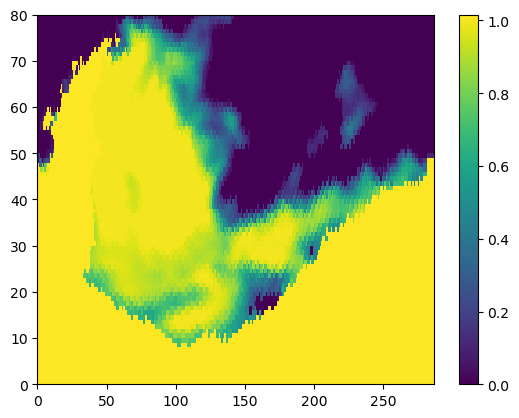

In [39]:
plt.pcolormesh(ICECON_ll[0,:,:])
plt.colorbar()

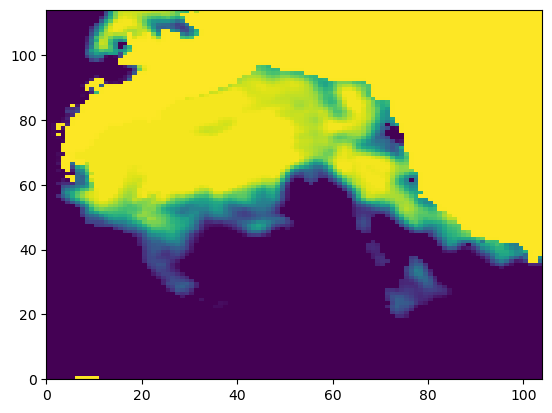

In [37]:
plot = plt.pcolormesh(ICECON_ps[0,:,:])

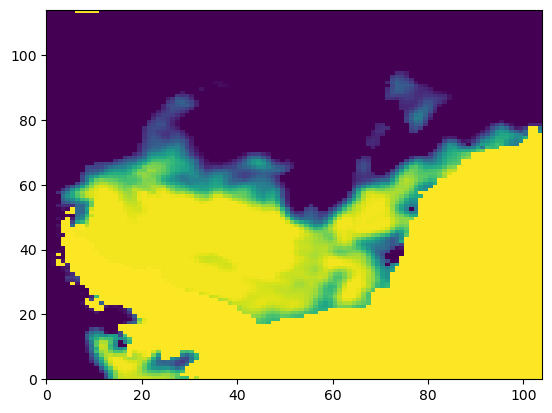

In [38]:
psflip = np.flip(ICECON_ps, 1)
plt.pcolormesh(psflip[0,:,:])